In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow import keras
from sklearn import preprocessing

In [253]:
import pandas as pd
import numpy as np
data = pd.read_csv("../data/data.csv")
df = pd.DataFrame(data)
df = df.iloc[: , 1:]
print("Modified Dataframe : ")
print(df)
dataTypeSeries = df.dtypes
print('Data type of each column of Dataframe :')
print(dataTypeSeries)

Modified Dataframe : 
              date      county       state     fips   cases  deaths
0       2020-01-21   Snohomish  Washington  53061.0     1.0     0.0
1       2020-01-22   Snohomish  Washington  53061.0     1.0     0.0
2       2020-01-23   Snohomish  Washington  53061.0     1.0     0.0
3       2020-01-24        Cook    Illinois  17031.0     1.0     0.0
4       2020-01-24   Snohomish  Washington  53061.0     1.0     0.0
...            ...         ...         ...      ...     ...     ...
775472  2020-12-05  Sweetwater     Wyoming  56037.0  2098.0    10.0
775473  2020-12-05       Teton     Wyoming  56039.0  1739.0     2.0
775474  2020-12-05       Uinta     Wyoming  56041.0  1187.0     5.0
775475  2020-12-05    Washakie     Wyoming  56043.0   519.0     8.0
775476  2020-12-05      Weston     Wyoming  56045.0   419.0     2.0

[775477 rows x 6 columns]
Data type of each column of Dataframe :
date       object
county     object
state      object
fips      float64
cases     float64
death

In [254]:
import time
import datetime
df = df.convert_dtypes()
print(df)
df['date'] = pd.to_datetime(df['date'])
dataTypeSeries = df.dtypes
print(dataTypeSeries)
df['date'] = (pd.to_datetime(df['date']).astype(np.int64)/100000000000).astype(np.int64)

dataTypeSeries = df.dtypes
#value - min/max - min
print('Data type of each column of Dataframe :')
print(dataTypeSeries)


              date      county       state   fips  cases  deaths
0       2020-01-21   Snohomish  Washington  53061      1       0
1       2020-01-22   Snohomish  Washington  53061      1       0
2       2020-01-23   Snohomish  Washington  53061      1       0
3       2020-01-24        Cook    Illinois  17031      1       0
4       2020-01-24   Snohomish  Washington  53061      1       0
...            ...         ...         ...    ...    ...     ...
775472  2020-12-05  Sweetwater     Wyoming  56037   2098      10
775473  2020-12-05       Teton     Wyoming  56039   1739       2
775474  2020-12-05       Uinta     Wyoming  56041   1187       5
775475  2020-12-05    Washakie     Wyoming  56043    519       8
775476  2020-12-05      Weston     Wyoming  56045    419       2

[775477 rows x 6 columns]
date      datetime64[ns]
county            string
state             string
fips               Int64
cases              Int64
deaths             Int64
dtype: object
Data type of each column of D

In [207]:
df

,date,county,state,fips,cases,deaths
0,15795648,Snohomish,Washington,53061,1,0
1,15796512,Snohomish,Washington,53061,1,0
2,15797376,Snohomish,Washington,53061,1,0
3,15798240,Cook,Illinois,17031,1,0
4,15798240,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
775472,16071264,Sweetwater,Wyoming,56037,2098,10
775473,16071264,Teton,Wyoming,56039,1739,2
775474,16071264,Uinta,Wyoming,56041,1187,5
775475,16071264,Washakie,Wyoming,56043,519,8


In [255]:
print(df.cases.isna().sum().sum())
print(df.date.isna().sum().sum())
print(df.state.isna().sum().sum())
print(df.county.isna().sum().sum())
print(df.fips.isna().sum().sum())
print(df.deaths.isna().sum().sum())
print(df.cases.isnull().sum().sum())
print(df.date.isnull().sum().sum())
print(df.state.isnull().sum().sum())
print(df.county.isnull().sum().sum())
print(df.fips.isnull().sum().sum())
print(df.deaths.isnull().sum().sum())

0
0
0
0
0
0
0
0
0
0
0
0


In [256]:

df['state'] = (df['fips']/1000).astype(np.int64)

df = df.convert_dtypes()
print(df)

            date      county  state   fips  cases  deaths
0       15795648   Snohomish     53  53061      1       0
1       15796512   Snohomish     53  53061      1       0
2       15797376   Snohomish     53  53061      1       0
3       15798240        Cook     17  17031      1       0
4       15798240   Snohomish     53  53061      1       0
...          ...         ...    ...    ...    ...     ...
775472  16071264  Sweetwater     56  56037   2098      10
775473  16071264       Teton     56  56039   1739       2
775474  16071264       Uinta     56  56041   1187       5
775475  16071264    Washakie     56  56043    519       8
775476  16071264      Weston     56  56045    419       2

[775477 rows x 6 columns]


In [257]:
df_no_county = df.iloc[:,[0,2,3,4,5]]
from sklearn.utils import shuffle
df_no_county = shuffle(df_no_county)
df_no_county_pred = df_no_county.iloc[:100,]
df_no_county = df_no_county.iloc[100:,]

In [258]:
df_data = df_no_county.iloc[:,:4]
print(df_data)

            date  state   fips  cases
410615  15971040     26  26073    209
265746  15930432     26  26165     23
39242   15862176     40  40053      1
485249  15991776     21  21099    156
225153  15918336     53  53015    101
...          ...    ...    ...    ...
723037  16057440     19  19189    825
712521  16053984     51  51141    389
403568  15969312     13  13107    511
27676   15857856     48  48469     20
174047  15903648     42  42121      8

[775377 rows x 4 columns]


In [259]:
df_result = df_no_county.iloc[:,4:]
df_result=np.asarray(df_result).astype(np.float64)
print(df_result)

[[9.]
 [3.]
 [0.]
 ...
 [9.]
 [0.]
 [0.]]


In [260]:
df_data_train, df_data_test,df_result_train,df_result_test = train_test_split(df_data,df_result, test_size=0.25, random_state=1)

In [261]:
print(df_data_train, df_data_test)

            date  state   fips  cases
574760  16015968     54  54089     59
622283  16029792     13  13109    490
411107  15971040     33  33011   3863
169812  15902784     20  20003      1
309389  15942528     45  45027    462
...          ...    ...    ...    ...
766037  16068672     55  55127   7179
625446  16030656     13  13163    870
479378  15990048     28  28019    158
342029  15952032     21  21031    280
708104  16053120     30  30059    101

[581532 rows x 4 columns]             date  state   fips  cases
415617  15972768      1   1063    260
24862   15856992     37  37071     31
277777  15933888     24  24011    318
570100  16015104     29  29035     96
354642  15955488     26  26009     33
...          ...    ...    ...    ...
487798  15992640     13  13159    193
434226  15977088     55  55067     74
220132  15917472     19  19047    589
147905  15895872     47  47121     22
113303  15885504     47  47079     13

[193845 rows x 4 columns]


In [297]:
print(df_result_train,df_result_test)

[[  0.]
 [  6.]
 [279.]
 ...
 [  4.]
 [ 14.]
 [  7.]] [[11.]
 [ 0.]
 [ 3.]
 ...
 [ 2.]
 [ 0.]
 [ 0.]]


In [290]:
from sklearn.preprocessing import MinMaxScaler
scaler_data = preprocessing.StandardScaler()
death_scaler = preprocessing.StandardScaler()
df_data_train_2 = pd.DataFrame(scaler_data.fit_transform(df_data_train), columns = df_data_train.columns)
print(df_data_train_2)
df_result_train_2 = pd.DataFrame(death_scaler.fit_transform(df_result_train) )
print(df_result_train_2)
df_data_test_2 = pd.DataFrame(scaler_data.transform(df_data_test),columns = df_data_test.columns)
print(df_data_test_2)
df_result_test_2 = pd.DataFrame(death_scaler.transform(df_result_test))
print(df_result_test_2)

            date     state      fips     cases
0       0.049908  1.553416  1.550697 -0.199633
1       0.059547 -1.127923 -1.126229 -0.141698
2       0.018582  0.180048  0.173824  0.311703
3      -0.029009 -0.670133 -0.675894 -0.207429
4      -0.001297  0.964830  0.958743 -0.145461
...          ...       ...       ...       ...
581527  0.086655  1.618815  1.618502  0.757442
581528  0.060149 -1.127923 -1.122702 -0.090618
581529  0.031835 -0.146945 -0.152267 -0.186325
581530  0.005329 -0.604735 -0.608742 -0.169926
581531  0.075812 -0.016148 -0.019009 -0.193987

[581532 rows x 4 columns]
               0
0      -0.203208
1      -0.174346
2       1.138866
3      -0.203208
4       0.013256
...          ...
581527  0.061359
581528 -0.049278
581529 -0.183967
581530 -0.135864
581531 -0.169536

[581532 rows x 1 columns]
            date     state      fips     cases
0       0.019787 -1.912705 -1.913107 -0.172614
1      -0.060937  0.441642  0.439035 -0.203397
2      -0.007322 -0.408539 -0.414081 

In [344]:
def create_model():
    '''
    Create a fully connected neural network with one input layer, one hidden layer and one output layer with softmax activation.
    '''
    input_layer = keras.layers.Input(shape=(4,)) # Input layer
    h = keras.layers.Dense(32, activation="relu")(input_layer)
    h = keras.layers.Dense(16, activation="relu")(h)# Hidden layer
    h = keras.layers.Dense(4, activation="relu")(h)
    #h = keras.layers.Dense(24, activation="relu")(h)
    #h = keras.layers.Dense(32, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Output layer
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [345]:
model = create_model() # We create the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-2), loss='mean_squared_error', metrics=['accuracy']) # Compile the model: define optimizer, loss and eventual metrics


In [346]:
model_history = model.fit(df_data_train_2,df_result_train_2,
                          batch_size=512,
                          epochs=250,
                          validation_data=(df_data_test_2,df_result_test_2))

Epoch 1/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2506 - accuracy: 0.0000e+00 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2287 - accuracy: 0.0000e+00 - val_loss: 0.2177 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2158 - accuracy: 0.0000e+00 - val_loss: 0.2022 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2017 - accuracy: 0.0000e+00 - val_loss: 0.1876 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1865 - accuracy: 0.0000e+00 - val_loss: 0.1730 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.1755 - accuracy: 0.0000e+00 - val_loss: 0.1782 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.169

In [347]:
preds = model.predict(scaler_data.transform(df_no_county_pred.iloc[:,:4]))
         

In [348]:
preds

array([[-0.17],
       [-0.18],
       [-0.16],
       [-0.05],
       [-0.09],
       [-0.18],
       [-0.08],
       [ 3.72],
       [ 0.06],
       [-0.14],
       [-0.19],
       [-0.16],
       [-0.15],
       [-0.05],
       [ 0.15],
       [-0.17],
       [-0.19],
       [-0.19],
       [-0.01],
       [-0.1 ],
       [-0.18],
       [-0.17],
       [-0.17],
       [-0.18],
       [-0.16],
       [-0.17],
       [ 0.07],
       [-0.11],
       [-0.18],
       [ 0.18],
       [ 0.31],
       [ 0.5 ],
       [-0.09],
       [-0.1 ],
       [-0.16],
       [-0.19],
       [-0.13],
       [-0.18],
       [-0.19],
       [-0.15],
       [-0.16],
       [-0.09],
       [-0.18],
       [-0.17],
       [ 0.11],
       [-0.16],
       [-0.05],
       [-0.15],
       [-0.19],
       [-0.18],
       [-0.16],
       [-0.2 ],
       [-0.06],
       [ 0.21],
       [ 2.21],
       [-0.18],
       [-0.14],
       [-0.01],
       [-0.13],
       [-0.11],
       [-0.17],
       [-0.13],
       [

In [349]:
np.set_printoptions(precision=2)
death_scaler.inverse_transform(preds)

array([[7.49e+00],
       [3.83e+00],
       [8.32e+00],
       [3.13e+01],
       [2.36e+01],
       [4.15e+00],
       [2.65e+01],
       [8.16e+02],
       [5.48e+01],
       [1.27e+01],
       [3.24e+00],
       [8.63e+00],
       [1.00e+01],
       [3.19e+01],
       [7.29e+01],
       [6.77e+00],
       [3.61e+00],
       [3.72e+00],
       [4.01e+01],
       [2.23e+01],
       [5.51e+00],
       [7.06e+00],
       [7.79e+00],
       [3.94e+00],
       [9.93e+00],
       [7.55e+00],
       [5.78e+01],
       [2.02e+01],
       [5.03e+00],
       [7.94e+01],
       [1.08e+02],
       [1.46e+02],
       [2.34e+01],
       [2.07e+01],
       [9.15e+00],
       [3.46e+00],
       [1.42e+01],
       [4.40e+00],
       [3.35e+00],
       [1.02e+01],
       [8.31e+00],
       [2.39e+01],
       [3.94e+00],
       [7.44e+00],
       [6.45e+01],
       [8.30e+00],
       [3.23e+01],
       [1.08e+01],
       [2.85e+00],
       [4.13e+00],
       [9.50e+00],
       [3.72e-01],
       [2.96

In [350]:
res = df_no_county_pred.iloc[:,4:]

In [351]:
res['real'] = death_scaler.inverse_transform(preds)

In [352]:
print(res.to_string())

        deaths        real
306587       8    7.494375
162029       0    3.833517
347077       0    8.324247
254787      49   31.332241
478408      22   23.592974
112573       0    4.153093
671922       4   26.523563
273673     746  816.456116
134274      56   54.773060
167972       3   12.652517
657965       0    3.242056
250701       2    8.630163
468353       0   10.029829
710127      71   31.933727
612034     178   72.918915
34651        0    6.765535
152989       0    3.612200
90650        0    3.716288
349868      29   40.087761
452322       6   22.291975
483212       1    5.511042
623430       1    7.055212
607488       0    7.794237
76137        0    3.939447
726816       2    9.931147
324253       1    7.547174
642590      16   57.754372
95145       18   20.165401
229777       1    5.032499
431543      50   79.423668
687611      80  107.537720
611220     106  145.866379
455647       4   23.423946
478700      10   20.722069
216281       0    9.145624
229882       0    3.460398
5

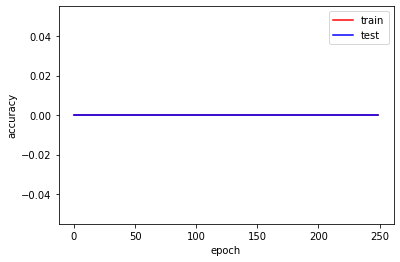

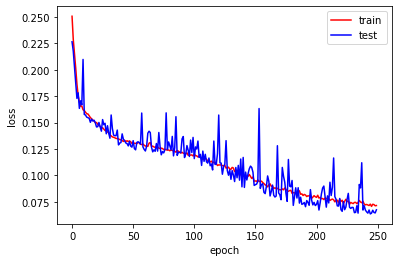

<Figure size 432x288 with 0 Axes>

In [353]:
t = range(250)

plt.plot(t,model_history.history["accuracy"],'r', label='train', linewidth=1.5)
plt.plot(t,model_history.history["val_accuracy"],'b', label='test', linewidth=1.5)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.clf()

plt.plot(t,model_history.history["loss"],'r', label='train', linewidth=1.5)
plt.plot(t,model_history.history["val_loss"],'b', label='test', linewidth=1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.clf()

In [358]:
def create_model():
    '''
    Create a fully connected neural network with one input layer, one hidden layer and one output layer with softmax activation.
    '''
    input_layer = keras.layers.Input(shape=(4,)) # Input layer
    h = keras.layers.Dense(128, activation="relu")(input_layer)
    #h = keras.layers.Dense(24, activation="relu")(h)
    #h = keras.layers.Dense(32, activation="relu")(h)
    h = keras.layers.Dense(1)(h) # Output layer
    model = keras.models.Model(inputs=input_layer, outputs=h)
    return model

In [359]:
model = create_model() # We create the model
model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-2), loss='mean_squared_error', metrics=['accuracy'])

In [360]:
model_history = model.fit(df_data_train_2,df_result_train_2,
                          batch_size=512,
                          epochs=250,
                          validation_data=(df_data_test_2,df_result_test_2))

Epoch 1/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2660 - accuracy: 0.0000e+00 - val_loss: 0.2342 - val_accuracy: 0.0000e+00
Epoch 2/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2419 - accuracy: 0.0000e+00 - val_loss: 0.2265 - val_accuracy: 0.0000e+00
Epoch 3/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2342 - accuracy: 0.0000e+00 - val_loss: 0.2196 - val_accuracy: 0.0000e+00
Epoch 4/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2269 - accuracy: 0.0000e+00 - val_loss: 0.2147 - val_accuracy: 0.0000e+00
Epoch 5/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2207 - accuracy: 0.0000e+00 - val_loss: 0.2089 - val_accuracy: 0.0000e+00
Epoch 6/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.2152 - accuracy: 0.0000e+00 - val_loss: 0.2039 - val_accuracy: 0.0000e+00
Epoch 7/250
1136/1136 [==============================] - 2s 2ms/step - loss: 0.209

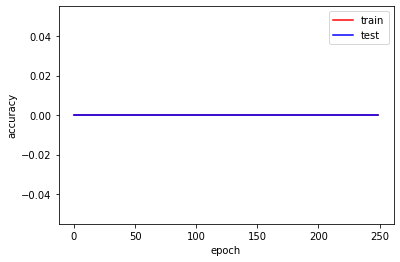

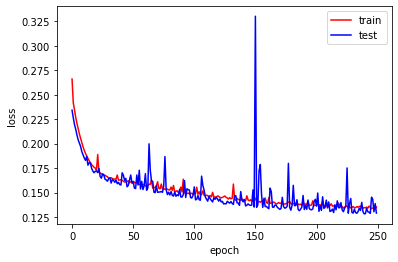

<Figure size 432x288 with 0 Axes>

In [361]:
t = range(250)

plt.plot(t,model_history.history["accuracy"],'r', label='train', linewidth=1.5)
plt.plot(t,model_history.history["val_accuracy"],'b', label='test', linewidth=1.5)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.clf()

plt.plot(t,model_history.history["loss"],'r', label='train', linewidth=1.5)
plt.plot(t,model_history.history["val_loss"],'b', label='test', linewidth=1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()
plt.clf()